## Split Audio

In [1]:
from pydub import AudioSegment
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inputDirectory = '../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'

In [4]:
def split_and_read(filename, audioFile, metaDataFile, sample_rate=22000):
    """
    Read .wav file, split all breaths, and resample to a fixed sample rate for uniformity
    Params - 
    filename: name of wav file
    audioPath: path to wav file
    metaDataPath: path to txt file containing the start and end times for each breath
    
    Returns - 
    List containg arrays corresponding to each breath in wav file of format:(resampled data of one breath in in wav file of size (length of breath in seconds*sample rate), length of breath in seconds, if the breath contains coarse crackles, if the breath contains fine crackles)
    """
    print('working on audio: ' + audioFile + ' and metafile: ' + metaDataFile)
    recording_annotations = pd.read_csv(metaDataFile,
                                        names=['Start', 'End', 'Crackles', 'Wheezes'], delimiter='\t')

    recording_audio = AudioSegment.from_wav(audioFile)
    data = [filename]
    print(len(recording_annotations.index))

    for i in range(len(recording_annotations.index)):
        
        row = recording_annotations.loc[i]
        start = row['Start']
        end = row['End']
        crackles = int(row['Crackles'])
        wheezes = int(row['Wheezes'])
        
        audio_chunk = recording_audio[int(start*1000) : int(end*1000)]
        
        if ((crackles == 1) & (wheezes == 0)):
            if_crackles = True
            if_wheezes = False
        elif (crackles == 0) & (wheezes == 1):
            if_crackles = False
            if_wheezes = True
        elif (crackles == 0) & (wheezes == 0):
            if_crackles = False
            if_wheezes = False
        else :
            if_crackles = True
            if_wheezes = True
            
        
        samples = audio_chunk.get_array_of_samples()
        audio_chunk_data = np.array(samples).astype(np.float32)/32768 # convert 24 bit wav file to 16 bit
        audio_chunk_resampled = librosa.resample(audio_chunk_data, audio_chunk.frame_rate, sample_rate, res_type='kaiser_best')
        
        data.append([audio_chunk_resampled, len(audio_chunk), if_crackles, if_wheezes])
        
        print ("length of audio: " ,len(audio_chunk))
        
    return data

In [5]:
all_breath_list = []
breath_lengths = []
for filename in os.listdir(inputDirectory):
    if filename.endswith(".wav"):
        audioFile = os.path.join(inputDirectory, filename)
        metaDataFile = os.path.join(inputDirectory, filename.replace(".wav",".txt"))
        data = split_and_read(filename, audioFile, metaDataFile)
        breath_chunk_data = [(d[0], d[2], d[3]) for d in data[1:]]
        all_breath_list.extend(breath_chunk_data)
        breath_lengths.extend((d[1]) for d in data[1:])
    else:
        continue

working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b1_Tc_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b1_Tc_mc_LittC2SE.txt
6
length of audio:  3258
length of audio:  4072
length of audio:  3300
length of audio:  3728
length of audio:  3772
length of audio:  1843
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/113_1b1_Lr_sc_Litt3200.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/113_1b1_Lr_sc_Litt3200.txt
7
length of audio:  1866
length of audio:  1528
length of audio:  2685
length of audio:  1500
length of audio:  1298
length of audio:  1622
length of audio:  4076
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/178_1b3_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sou

4
length of audio:  3990
length of audio:  6677
length of audio:  6344
length of audio:  1870
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/134_2b1_Ar_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/134_2b1_Ar_mc_LittC2SE.txt
5
length of audio:  1670
length of audio:  4757
length of audio:  4830
length of audio:  4957
length of audio:  3714
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/157_1b1_Pr_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/157_1b1_Pr_sc_Meditron.txt
15
length of audio:  3592
length of audio:  3176
length of audio:  2992
length of audio:  2697
length of audio:  5109
length of audio:  5608
length of audio:  4875
length of audio:  4285
length of audio:  3511
length of audio:  4061
length of audio:  3571
length of audio:  4215
length

length of audio:  2008
length of audio:  2815
length of audio:  367
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Lr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Lr_mc_AKGC417L.txt
6
length of audio:  3040
length of audio:  2771
length of audio:  2888
length of audio:  3005
length of audio:  3172
length of audio:  2738
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_2p3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_2p3_Al_mc_AKGC417L.txt
6
length of audio:  2155
length of audio:  3488
length of audio:  3678
length of audio:  3727
length of audio:  3750
length of audio:  964
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/139_1b1_Pr_sc_Litt3200.wav and metafile: ../inpu

5
length of audio:  3809
length of audio:  4178
length of audio:  3876
length of audio:  5201
length of audio:  1711
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_2p2_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_2p2_Tc_mc_AKGC417L.txt
7
length of audio:  2771
length of audio:  2855
length of audio:  2671
length of audio:  2905
length of audio:  2471
length of audio:  2571
length of audio:  2604
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Pr_mc_AKGC417L.txt
8
length of audio:  1334
length of audio:  2452
length of audio:  2738
length of audio:  2369
length of audio:  2572
length of audio:  2535
length of audio:  2548
length of audio:  2714
working on audio: ../input/Res

length of audio:  3089
length of audio:  2965
length of audio:  3054
length of audio:  2372
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Pl_mc_AKGC417L.txt
6
length of audio:  1703
length of audio:  3120
length of audio:  3491
length of audio:  3405
length of audio:  3139
length of audio:  3239
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/224_1b2_Al_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/224_1b2_Al_sc_Meditron.txt
7
length of audio:  3584
length of audio:  3357
length of audio:  3230
length of audio:  3157
length of audio:  3014
length of audio:  3000
length of audio:  615
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/1

7
length of audio:  1692
length of audio:  3300
length of audio:  2910
length of audio:  3198
length of audio:  3062
length of audio:  2945
length of audio:  2775
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/166_1p1_Pr_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/166_1p1_Pr_sc_Meditron.txt
24
length of audio:  2354
length of audio:  2374
length of audio:  3231
length of audio:  1991
length of audio:  2253
length of audio:  2581
length of audio:  2248
length of audio:  1885
length of audio:  2399
length of audio:  2107
length of audio:  1865
length of audio:  1729
length of audio:  1976
length of audio:  1597
length of audio:  2410
length of audio:  3407
length of audio:  3503
length of audio:  3452
length of audio:  3115
length of audio:  3322
length of audio:  3196
length of audio:  3119
length of audio:  3478
length of audio:  2460
working on audio: ../input/Res

5
length of audio:  3937
length of audio:  3936
length of audio:  3598
length of audio:  3175
length of audio:  2753
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_1p2_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_1p2_Ar_mc_AKGC417L.txt
6
length of audio:  3506
length of audio:  3389
length of audio:  3339
length of audio:  3221
length of audio:  2989
length of audio:  2404
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_1b3_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_1b3_Pr_mc_AKGC417L.txt
12
length of audio:  1929
length of audio:  1989
length of audio:  1833
length of audio:  1893
length of audio:  1774
length of audio:  1738
length of audio:  1535
length of audio:  1476
length of audio:  1536
length of audio:  1512
length

8
length of audio:  2393
length of audio:  2416
length of audio:  2512
length of audio:  2584
length of audio:  2369
length of audio:  2726
length of audio:  2464
length of audio:  1060
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b4_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b4_Ar_mc_AKGC417L.txt
5
length of audio:  3322
length of audio:  3973
length of audio:  3839
length of audio:  4158
length of audio:  3439
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b3_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b3_Tc_mc_AKGC417L.txt
7
length of audio:  2704
length of audio:  2938
length of audio:  2454
length of audio:  2722
length of audio:  2754
length of audio:  2854
length of audio:  2405
working on audio: ../input/Res

10
length of audio:  1940
length of audio:  1976
length of audio:  2155
length of audio:  1988
length of audio:  2095
length of audio:  1989
length of audio:  2119
length of audio:  2119
length of audio:  2000
length of audio:  785
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/127_1b1_Ar_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/127_1b1_Ar_sc_Meditron.txt
10
length of audio:  2354
length of audio:  2239
length of audio:  1969
length of audio:  2425
length of audio:  2025
length of audio:  2140
length of audio:  2182
length of audio:  1783
length of audio:  2254
length of audio:  513
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b3_Al_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b3_Al_mc_LittC2SE.txt
9
length of audio:  2456
length 

6
length of audio:  3834
length of audio:  3357
length of audio:  3417
length of audio:  3404
length of audio:  3298
length of audio:  1570
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_1b2_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_1b2_Pr_mc_AKGC417L.txt
4
length of audio:  6411
length of audio:  3639
length of audio:  3840
length of audio:  3539
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/198_1b5_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/198_1b5_Ar_mc_AKGC417L.txt
7
length of audio:  2251
length of audio:  3147
length of audio:  3536
length of audio:  3418
length of audio:  3146
length of audio:  3335
length of audio:  1100
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_file

2
length of audio:  4657
length of audio:  5576
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/195_1b1_Lr_sc_Litt3200.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/195_1b1_Lr_sc_Litt3200.txt
9
length of audio:  1968
length of audio:  1646
length of audio:  1306
length of audio:  2315
length of audio:  1338
length of audio:  2015
length of audio:  4526
length of audio:  3569
length of audio:  1653
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b2_Tc_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b2_Tc_mc_LittC2SE.txt
6
length of audio:  1086
length of audio:  3285
length of audio:  3815
length of audio:  3828
length of audio:  3800
length of audio:  4100
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_file

8
length of audio:  1714
length of audio:  2726
length of audio:  2595
length of audio:  2608
length of audio:  2666
length of audio:  2369
length of audio:  2489
length of audio:  1047
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/207_2b3_Al_mc_AKGC417L.txt
6
length of audio:  3523
length of audio:  3439
length of audio:  3472
length of audio:  3523
length of audio:  3322
length of audio:  1552
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_1p3_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/213_1p3_Pl_mc_AKGC417L.txt
7
length of audio:  3121
length of audio:  2521
length of audio:  2839
length of audio:  2537
length of audio:  2588
length of audio:  2804
length of audio:  869
working 

4
length of audio:  3990
length of audio:  6677
length of audio:  6344
length of audio:  1870
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_4b4_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_4b4_Al_mc_AKGC417L.txt
10
length of audio:  1952
length of audio:  2119
length of audio:  1932
length of audio:  2163
length of audio:  1986
length of audio:  1979
length of audio:  2309
length of audio:  2119
length of audio:  1929
length of audio:  915
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_1b2_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/177_1b2_Ar_mc_AKGC417L.txt
4
length of audio:  6411
length of audio:  3639
length of audio:  3840
length of audio:  3539
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Data

length of audio:  3503
length of audio:  2975
length of audio:  3730
length of audio:  3866
length of audio:  2964
length of audio:  2947
length of audio:  2947
length of audio:  2936
length of audio:  3903
length of audio:  4643
length of audio:  5416
length of audio:  4854
length of audio:  5272
length of audio:  4543
length of audio:  4793
length of audio:  2669
length of audio:  4237
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/183_1b1_Tc_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/183_1b1_Tc_sc_Meditron.txt
4
length of audio:  7043
length of audio:  6242
length of audio:  6229
length of audio:  443
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/193_7b3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/193_7b3_Al_mc_AKGC417L.txt
8
length of 

length of audio:  4898
length of audio:  2216
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/179_1b1_Tc_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/179_1b1_Tc_sc_Meditron.txt
7
length of audio:  1529
length of audio:  2971
length of audio:  1929
length of audio:  1714
length of audio:  2057
length of audio:  1929
length of audio:  1841
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/192_2b2_Al_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/192_2b2_Al_mc_LittC2SE.txt
8
length of audio:  2527
length of audio:  2516
length of audio:  2985
length of audio:  2886
length of audio:  2986
length of audio:  2914
length of audio:  2800
length of audio:  314
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/2

working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p2_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p2_Ar_mc_AKGC417L.txt
5
length of audio:  2288
length of audio:  3873
length of audio:  3790
length of audio:  3956
length of audio:  4541
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p2_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p2_Ll_mc_AKGC417L.txt
5
length of audio:  2738
length of audio:  3839
length of audio:  3857
length of audio:  4324
length of audio:  3889
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/133_2p2_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/133_2p2_Pl_mc_AKGC417L.txt
9
length o

9
length of audio:  1129
length of audio:  1743
length of audio:  1886
length of audio:  2228
length of audio:  2414
length of audio:  2299
length of audio:  2101
length of audio:  2014
length of audio:  1515
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/114_1b4_Lr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/114_1b4_Lr_mc_AKGC417L.txt
7
length of audio:  2370
length of audio:  3309
length of audio:  3381
length of audio:  3202
length of audio:  3048
length of audio:  3369
length of audio:  952
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Pr_mc_AKGC417L.txt
5
length of audio:  3121
length of audio:  4509
length of audio:  3789
length of audio:  4308
length of audio:  1485
working 

5
length of audio:  3262
length of audio:  3333
length of audio:  3798
length of audio:  3869
length of audio:  3694
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/163_8b3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/163_8b3_Al_mc_AKGC417L.txt
6
length of audio:  3333
length of audio:  3029
length of audio:  3485
length of audio:  3334
length of audio:  2724
length of audio:  3621
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_8p3_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_8p3_Ar_mc_AKGC417L.txt
9
length of audio:  1047
length of audio:  2679
length of audio:  2690
length of audio:  2393
length of audio:  2500
length of audio:  2572
length of audio:  2643
length of audio:  2285
length of audio:  1106
working on audio: ../input/Res

8
length of audio:  2393
length of audio:  2416
length of audio:  2512
length of audio:  2584
length of audio:  2369
length of audio:  2726
length of audio:  2464
length of audio:  1060
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/159_1b1_Ll_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/159_1b1_Ll_sc_Meditron.txt
12
length of audio:  1684
length of audio:  1957
length of audio:  1701
length of audio:  1743
length of audio:  1686
length of audio:  1727
length of audio:  1487
length of audio:  1700
length of audio:  1843
length of audio:  1786
length of audio:  1504
length of audio:  1110
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_2b3_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/162_2b3_Tc_mc_AKGC417L.txt
4
length of audio:  3990
length

6
length of audio:  657
length of audio:  4743
length of audio:  4271
length of audio:  4514
length of audio:  5186
length of audio:  515
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p2_Ar_mc_AKGC417L.txt
7
length of audio:  1726
length of audio:  2678
length of audio:  3238
length of audio:  2941
length of audio:  3035
length of audio:  2715
length of audio:  2524
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p2_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p2_Pl_mc_AKGC417L.txt
10
length of audio:  1940
length of audio:  1976
length of audio:  2155
length of audio:  1988
length of audio:  2095
length of audio:  1989
length of audio:  2119
length of audio:  2119
length o

length of audio:  2362
length of audio:  2618
length of audio:  2188
length of audio:  3434
length of audio:  1194
length of audio:  754
length of audio:  1822
length of audio:  1519
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p4_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_1p4_Pr_mc_AKGC417L.txt
7
length of audio:  2786
length of audio:  3262
length of audio:  2857
length of audio:  2881
length of audio:  2679
length of audio:  2606
length of audio:  2785
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/149_1b1_Al_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/149_1b1_Al_sc_Meditron.txt
18
length of audio:  801
length of audio:  586
length of audio:  757
length of audio:  986
length of audio:  1057
length of audio:  1243
length of aud

9
length of audio:  1062
length of audio:  2369
length of audio:  2107
length of audio:  2298
length of audio:  2369
length of audio:  2131
length of audio:  2369
length of audio:  2202
length of audio:  2182
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/156_5b3_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/156_5b3_Ll_mc_AKGC417L.txt
9
length of audio:  2019
length of audio:  2173
length of audio:  2227
length of audio:  2002
length of audio:  2115
length of audio:  2221
length of audio:  2316
length of audio:  2173
length of audio:  2410
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/156_8b3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/156_8b3_Al_mc_AKGC417L.txt
8
length of audio:  2250
length of audio:  2381
length of audio:  2035
length 

length of audio:  2985
length of audio:  3143
length of audio:  1904
length of audio:  1843
length of audio:  3327
length of audio:  2318
length of audio:  3064
length of audio:  2089
length of audio:  3517
length of audio:  3921
length of audio:  2498
length of audio:  3747
length of audio:  3836
length of audio:  4257
length of audio:  4464
length of audio:  4619
length of audio:  3960
length of audio:  4852
length of audio:  3332
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p3_Ar_mc_AKGC417L.txt
10
length of audio:  1857
length of audio:  2131
length of audio:  1905
length of audio:  2000
length of audio:  1953
length of audio:  2095
length of audio:  1952
length of audio:  2072
length of audio:  2178
length of audio:  1726
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Databa

11
length of audio:  1743
length of audio:  2136
length of audio:  2016
length of audio:  1893
length of audio:  1964
length of audio:  1766
length of audio:  2392
length of audio:  2026
length of audio:  1959
length of audio:  1425
length of audio:  596
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/105_1b1_Tc_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/105_1b1_Tc_sc_Meditron.txt
8
length of audio:  2243
length of audio:  2600
length of audio:  2628
length of audio:  2828
length of audio:  3029
length of audio:  2815
length of audio:  2828
length of audio:  900
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_2b2_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_2b2_Tc_mc_AKGC417L.txt
7
length of audio:  1970
length of audio:  3289
length o

6
length of audio:  1014
length of audio:  4200
length of audio:  4986
length of audio:  5300
length of audio:  4071
length of audio:  343
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/184_1b1_Ar_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/184_1b1_Ar_sc_Meditron.txt
8
length of audio:  1114
length of audio:  2515
length of audio:  3113
length of audio:  3100
length of audio:  2343
length of audio:  2615
length of audio:  2929
length of audio:  2200
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/221_2b3_Ar_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/221_2b3_Ar_mc_LittC2SE.txt
5
length of audio:  2443
length of audio:  4413
length of audio:  4630
length of audio:  5099
length of audio:  3287
working on audio: ../input/Respiratory_Sound_Database/

length of audio:  1870
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/185_1b1_Lr_sc_Litt3200.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/185_1b1_Lr_sc_Litt3200.txt
7
length of audio:  2381
length of audio:  1849
length of audio:  1944
length of audio:  1704
length of audio:  1957
length of audio:  2970
length of audio:  3952
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b2_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b2_Tc_mc_AKGC417L.txt
5
length of audio:  3172
length of audio:  3106
length of audio:  3051
length of audio:  3185
length of audio:  3065
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b5_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sou

length of audio:  2737
length of audio:  3206
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2p5_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2p5_Al_mc_AKGC417L.txt
11
length of audio:  1743
length of audio:  2136
length of audio:  2016
length of audio:  1893
length of audio:  1964
length of audio:  1766
length of audio:  2392
length of audio:  2026
length of audio:  1959
length of audio:  1425
length of audio:  596
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/175_1b1_Lr_sc_Litt3200.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/175_1b1_Lr_sc_Litt3200.txt
4
length of audio:  2417
length of audio:  3107
length of audio:  3336
length of audio:  8404
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/

length of audio:  1905
length of audio:  2246
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/197_1b1_Al_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/197_1b1_Al_sc_Meditron.txt
3
length of audio:  7156
length of audio:  5786
length of audio:  7000
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b3_Ll_mc_AKGC417L.txt
6
length of audio:  3040
length of audio:  2771
length of audio:  2888
length of audio:  3005
length of audio:  3172
length of audio:  2738
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/204_7p5_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/204_7p5_Pr_mc_

7
length of audio:  2771
length of audio:  2621
length of audio:  2605
length of audio:  2671
length of audio:  2687
length of audio:  2622
length of audio:  1035
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/121_1b1_Tc_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/121_1b1_Tc_sc_Meditron.txt
6
length of audio:  2058
length of audio:  3857
length of audio:  4186
length of audio:  4386
length of audio:  4400
length of audio:  1086
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Lr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Lr_mc_AKGC417L.txt
5
length of audio:  3121
length of audio:  4509
length of audio:  3789
length of audio:  4308
length of audio:  1485
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Data

13
length of audio:  1593
length of audio:  1609
length of audio:  1593
length of audio:  1542
length of audio:  1559
length of audio:  1643
length of audio:  1442
length of audio:  1509
length of audio:  1424
length of audio:  1560
length of audio:  1441
length of audio:  1726
length of audio:  906
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/166_1p1_Pl_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/166_1p1_Pl_sc_Meditron.txt
24
length of audio:  2349
length of audio:  2389
length of audio:  3467
length of audio:  1815
length of audio:  2067
length of audio:  2722
length of audio:  2258
length of audio:  2086
length of audio:  2228
length of audio:  2107
length of audio:  1885
length of audio:  1543
length of audio:  1833
length of audio:  2068
length of audio:  2328
length of audio:  3337
length of audio:  3589
length of audio:  3125
length of audio:  3347
length 

5
length of audio:  3322
length of audio:  3973
length of audio:  3839
length of audio:  4158
length of audio:  3439
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1b3_Ar_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/158_1b3_Ar_mc_LittC2SE.txt
11
length of audio:  1927
length of audio:  1987
length of audio:  1770
length of audio:  1930
length of audio:  1414
length of audio:  1743
length of audio:  1514
length of audio:  2656
length of audio:  1530
length of audio:  1929
length of audio:  1471
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3b4_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3b4_Ar_mc_AKGC417L.txt
5
length of audio:  4511
length of audio:  4033
length of audio:  4121
length of audio:  3624
length of audio:  1464
workin

7
length of audio:  2768
length of audio:  3322
length of audio:  2886
length of audio:  4212
length of audio:  2533
length of audio:  3037
length of audio:  1124
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b3_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b3_Pr_mc_AKGC417L.txt
6
length of audio:  2082
length of audio:  4115
length of audio:  3607
length of audio:  3571
length of audio:  3868
length of audio:  2673
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/147_2b3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/147_2b3_Al_mc_AKGC417L.txt
5
length of audio:  3792
length of audio:  4094
length of audio:  4581
length of audio:  4479
length of audio:  1527
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Data

length of audio:  1500
length of audio:  1582
length of audio:  1775
length of audio:  1404
length of audio:  1715
length of audio:  1750
length of audio:  1857
length of audio:  1798
length of audio:  2107
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_8p3_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_8p3_Pl_mc_AKGC417L.txt
9
length of audio:  1178
length of audio:  2690
length of audio:  2620
length of audio:  2488
length of audio:  2440
length of audio:  2608
length of audio:  2488
length of audio:  2488
length of audio:  915
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/163_8b3_Pr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/163_8b3_Pr_mc_AKGC417L.txt
6
length of audio:  3333
length of audio:  3029
length of audio:  3485
length of 

length of audio:  1456
length of audio:  1416
length of audio:  1405
length of audio:  1344
length of audio:  1771
length of audio:  1482
length of audio:  4475
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p2_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_1p2_Tc_mc_AKGC417L.txt
5
length of audio:  2738
length of audio:  3839
length of audio:  3857
length of audio:  4324
length of audio:  3889
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt
7
length of audio:  2474
length of audio:  2592
length of audio:  2541
length of audio:  2643
length of audio:  2492
length of audio:  2977
length of audio:  2441
working on audio: ../input/Respiratory_Sound_Database/R

8
length of audio:  2309
length of audio:  2560
length of audio:  2464
length of audio:  2571
length of audio:  2596
length of audio:  2690
length of audio:  2607
length of audio:  2143
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/223_1b1_Ar_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/223_1b1_Ar_sc_Meditron.txt
10
length of audio:  2439
length of audio:  2870
length of audio:  3013
length of audio:  3221
length of audio:  3373
length of audio:  3057
length of audio:  3319
length of audio:  3379
length of audio:  3526
length of audio:  4435
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/109_1b1_Lr_sc_Litt3200.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/109_1b1_Lr_sc_Litt3200.txt
8
length of audio:  2686
length of audio:  2050
length of audio:  1925
length

length of audio:  2541
length of audio:  2584
length of audio:  2928
length of audio:  2391
length of audio:  5275
length of audio:  2509
length of audio:  2713
length of audio:  3014
length of audio:  2746
length of audio:  2627
length of audio:  2605
length of audio:  1895
length of audio:  3251
length of audio:  5566
length of audio:  5480
length of audio:  5932
length of audio:  5393
length of audio:  3436
length of audio:  2971
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b4_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b4_Pl_mc_AKGC417L.txt
6
length of audio:  2756
length of audio:  3229
length of audio:  3398
length of audio:  3449
length of audio:  3415
length of audio:  3703
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/147_2b4_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Da

9
length of audio:  1062
length of audio:  2369
length of audio:  2107
length of audio:  2298
length of audio:  2369
length of audio:  2131
length of audio:  2369
length of audio:  2202
length of audio:  2182
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/146_2b4_Ar_mc_AKGC417L.txt
6
length of audio:  3654
length of audio:  3726
length of audio:  4180
length of audio:  3774
length of audio:  3678
length of audio:  881
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/226_1b1_Pl_sc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/226_1b1_Pl_sc_LittC2SE.txt
11
length of audio:  1171
length of audio:  2343
length of audio:  2200
length of audio:  2129
length of audio:  1957
length of audio:  1884
length 

9
length of audio:  2471
length of audio:  2237
length of audio:  2170
length of audio:  2154
length of audio:  2069
length of audio:  2237
length of audio:  2071
length of audio:  2054
length of audio:  2020
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/205_2b3_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/205_2b3_Ll_mc_AKGC417L.txt
5
length of audio:  4113
length of audio:  3947
length of audio:  3177
length of audio:  3930
length of audio:  3228
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b2_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/186_2b2_Ar_mc_AKGC417L.txt
5
length of audio:  3941
length of audio:  4131
length of audio:  3582
length of audio:  4120
length of audio:  1333
working on audio: ../input/Respiratory_Sound_Database

6
length of audio:  2838
length of audio:  3589
length of audio:  3689
length of audio:  3473
length of audio:  2536
length of audio:  2572
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Lr_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Lr_mc_AKGC417L.txt
8
length of audio:  1334
length of audio:  2452
length of audio:  2738
length of audio:  2369
length of audio:  2572
length of audio:  2535
length of audio:  2548
length of audio:  2714
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b4_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b4_Al_mc_AKGC417L.txt
6
length of audio:  2756
length of audio:  3229
length of audio:  3398
length of audio:  3449
length of audio:  3415
length of audio:  3703
working on audio: ../input/Res

length of audio:  3556
length of audio:  4140
length of audio:  3605
length of audio:  4108
length of audio:  3589
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Tc_mc_AKGC417L.txt
5
length of audio:  3857
length of audio:  4007
length of audio:  3889
length of audio:  4057
length of audio:  1870
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/200_2p4_Pl_mc_AKGC417L.txt
5
length of audio:  3121
length of audio:  4509
length of audio:  3789
length of audio:  4308
length of audio:  1485
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/170_1b2_Al_mc_AKGC417L.wav and metafile: ../in

6
length of audio:  1329
length of audio:  3500
length of audio:  4128
length of audio:  3857
length of audio:  4229
length of audio:  2886
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Ll_mc_AKGC417L.txt
6
length of audio:  1703
length of audio:  3120
length of audio:  3491
length of audio:  3405
length of audio:  3139
length of audio:  3239
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b1_Ar_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b1_Ar_mc_LittC2SE.txt
6
length of audio:  3172
length of audio:  3942
length of audio:  3456
length of audio:  3730
length of audio:  3743
length of audio:  1857
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Data

9
length of audio:  1629
length of audio:  2928
length of audio:  2356
length of audio:  2058
length of audio:  2229
length of audio:  2400
length of audio:  2085
length of audio:  2244
length of audio:  1957
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2p5_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2p5_Tc_mc_AKGC417L.txt
11
length of audio:  1743
length of audio:  2136
length of audio:  2016
length of audio:  1893
length of audio:  1964
length of audio:  1766
length of audio:  2392
length of audio:  2026
length of audio:  1959
length of audio:  1425
length of audio:  596
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_3p2_Al_mc_AKGC417L.txt
6
length of audio:  3455
length 

5
length of audio:  3005
length of audio:  4524
length of audio:  3155
length of audio:  3540
length of audio:  4157
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/151_2p3_Ar_mc_AKGC417L.txt
6
length of audio:  1703
length of audio:  3120
length of audio:  3491
length of audio:  3405
length of audio:  3139
length of audio:  3239
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b3_Ll_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/176_1b3_Ll_mc_AKGC417L.txt
6
length of audio:  2082
length of audio:  4115
length of audio:  3607
length of audio:  3571
length of audio:  3868
length of audio:  2673
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_file

9
length of audio:  1012
length of audio:  2677
length of audio:  2715
length of audio:  2560
length of audio:  2559
length of audio:  2477
length of audio:  2403
length of audio:  2525
length of audio:  965
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b4_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/172_1b4_Al_mc_AKGC417L.txt
6
length of audio:  2403
length of audio:  2605
length of audio:  2555
length of audio:  2871
length of audio:  3288
length of audio:  2773
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p4_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/203_1p4_Ar_mc_AKGC417L.txt
9
length of audio:  1523
length of audio:  2369
length of audio:  2393
length of audio:  2381
length of audio:  2500
length of audio:  2393
length o

length of audio:  2296
length of audio:  2204
length of audio:  2202
length of audio:  2214
length of audio:  1917
length of audio:  2070
length of audio:  2211
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/116_1b2_Pl_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/116_1b2_Pl_sc_Meditron.txt
4
length of audio:  3428
length of audio:  7057
length of audio:  6829
length of audio:  2614
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/136_1b1_Ar_sc_Meditron.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/136_1b1_Ar_sc_Meditron.txt
9
length of audio:  2143
length of audio:  2314
length of audio:  2558
length of audio:  2185
length of audio:  2128
length of audio:  1955
length of audio:  2242
length of audio:  2323
length of audio:  2047
working on audio: ../input/Respi

8
length of audio:  1042
length of audio:  2658
length of audio:  2728
length of audio:  2929
length of audio:  3157
length of audio:  2928
length of audio:  3029
length of audio:  1143
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_2p3_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/174_2p3_Al_mc_AKGC417L.txt
4
length of audio:  4074
length of audio:  4424
length of audio:  4824
length of audio:  3907
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Pl_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/160_1b3_Pl_mc_AKGC417L.txt
5
length of audio:  3857
length of audio:  4007
length of audio:  3889
length of audio:  4057
length of audio:  1870
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_file

6
length of audio:  2756
length of audio:  3229
length of audio:  3398
length of audio:  3449
length of audio:  3415
length of audio:  3703
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Tc_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_3p3_Tc_mc_AKGC417L.txt
7
length of audio:  2428
length of audio:  2822
length of audio:  2845
length of audio:  2976
length of audio:  2738
length of audio:  2845
length of audio:  2845
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Al_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/107_2b5_Al_mc_AKGC417L.txt
8
length of audio:  1334
length of audio:  2452
length of audio:  2738
length of audio:  2369
length of audio:  2572
length of audio:  2535
length of audio:  2548
length of audio:  2714
working

length of audio:  3488
length of audio:  3678
length of audio:  3727
length of audio:  3750
length of audio:  964
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b1_Al_mc_LittC2SE.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/135_2b1_Al_mc_LittC2SE.txt
9
length of audio:  887
length of audio:  2386
length of audio:  2471
length of audio:  2514
length of audio:  2386
length of audio:  2671
length of audio:  2358
length of audio:  2242
length of audio:  2029
working on audio: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_3b3_Ar_mc_AKGC417L.wav and metafile: ../input/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/154_3b3_Ar_mc_AKGC417L.txt
5
length of audio:  2708
length of audio:  4331
length of audio:  4348
length of audio:  4499
length of audio:  3111


In [6]:
len(all_breath_list)

6898

In [8]:
none=[]
crackles=[]
wheezes=[]
both=[]
for breath in all_breath_list:
    if (breath[1] == False) & (breath[2] == False):
        none.append(breath)
    elif (breath[1] == True) & (breath[2] == False):
        crackles.append(breath)
    elif (breath[1] == False) & (breath[2] == True):
        wheezes.append(breath)
    else:
        both.append(breath)
    

longest breath:  16.163 seconds
shortest breath: 0.2 seconds
Petcentage of breaths less than  6  seconds long: 0.9827486227892143 %
Petcentage of breaths less than  5  seconds long: 0.9660771238040011 %


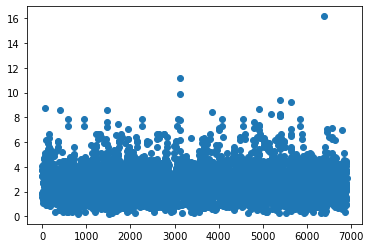

In [11]:
breath_len_arr = np.array(breath_lengths)/1000
plt.plot(breath_len_arr, 'o')
print('longest breath: ',max(breath_len_arr), "seconds")
print('shortest breath:', min(breath_len_arr), "seconds")
breath_lenght = 6
print('Petcentage of breaths less than ', breath_lenght, ' seconds long:', np.sum(breath_len_arr < breath_lenght)/len(breath_len_arr), '%')
breath_lenght = 5
print('Petcentage of breaths less than ', breath_lenght, ' seconds long:', np.sum(breath_len_arr < breath_lenght)/len(breath_len_arr), '%')

## Split into test and train datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_test_ratio = 0.2

In [14]:
none_train, none_test = train_test_split(none, test_size = train_test_ratio, random_state=10)
crackles_train, crackles_test  = train_test_split(crackles, test_size = train_test_ratio, random_state=10)
wheezes_train, wheezes_test  = train_test_split(wheezes, test_size = train_test_ratio, random_state=10)
both_train, both_test  = train_test_split(both, test_size = train_test_ratio, random_state=10)

In [19]:
print("Total number of files: ", len(all_breath_list))
print("Train files:")
print("None: ", len(none_train))
print("Crackles: ", len(crackles_train))
print("Wheezes: ", len(wheezes_train))
print("Both: ", len(both_train))
print()
print("Test files:")
print("None: ", len(none_test))
print("Crackles: ", len(crackles_test))
print("Wheezes: ", len(wheezes_test))
print("Both: ", len(both_test))

Total number of files:  6898
Train files:
None:  2913
Crackles:  1491
Wheezes:  708
Both:  404

Test files:
None:  729
Crackles:  373
Wheezes:  178
Both:  102


## Process data

In [21]:
from sklearn.preprocessing import MinMaxScaler
import scipy.signal

In [35]:
def rand_stretch(sound, rate=np.random.uniform(low=0.5,high=1.5)):
    """
    Randomly squeeze or strech the sound array in the passed data and return the squeezed file
    Params - 
    sound: Array(soundData, if_coarse_flag, if_fine_flag)
    rate: constaints for how much to stretch or sqeeze the file. Default: squeeze or strech so that the new file is 0.5 to 1.5 the speed of the original
    
    Returns - 
    Array(squeezed file, if_coarse_flag, if_fine_flag)
    """
    stretched_sound = librosa.effects.time_stretch(sound, rate)
    return stretched_sound

def stretch_breaths_list(data_list, repeat, append_fraction=1):
    """
    Do rand_stretch for a list of arays to be passed to rand_stretch
    Params - 
    data_list: list of arrays to be passed to rand_stretch
    repeat: How many time to pass list to rand_stretch. Essetially, the number of times to mulitply the number of sound arrays by 2
    append_fraction: fraction of data_list to randomly sample data_list and pass the sampled list to rand_stretch. By default takes the whole data_list
    """
    streched_data_list = []
    streched_data_list.extend(data_list)
    for i in range(0, repeat):
        np.random.shuffle(data_list)
        count = int(len(data_list) * (1-append_fraction))
        data_list_cut = data_list[count:]
        stretched = []
        for data in data_list_cut:
            sound = data[0]
            stretched.append((rand_stretch(sound), data[1], data[2]))
        streched_data_list.extend(stretched)
    return streched_data_list

In [23]:
def resize(data, final_len_seconds, sample_rate=22000):
    """
    Resize the sound file passed to it to a particular size so that it can be trained. The model requires all the arrays to be trained to be the same size
    If the sound file is smaller than the requied lenght to be padded, copy it a whole number of times and pad the rest with zeros
    If the sound file is bigger than the required length, squeeze it till it is the right length
    Params - 
    data: Array(soundData, if_coarse_flag, if_fine_flag)
    final_len_seconds: length in seconds the file needs to be resized to
    sample_rate: current sample rate of the file
    
    Returns - 
    Array(ResizedSoundData, if_coarse_flag, if_fine_flag)
    
    """
    len_to_fill = int(final_len_seconds * sample_rate)
    sound = data[0]
    len_filled = len(sound)
    len_filled_seconds = len_filled / sample_rate 
    initial_sound = sound
    if (len(initial_sound) < len_to_fill):
        for n in range(0, int(final_len_seconds//len_filled_seconds)-1):
            initial_sound=np.concatenate((initial_sound,sound), axis=0)
        len_to_pad = len_to_fill-len(initial_sound)
        final_data = np.pad(initial_sound, [(0, len_to_pad)], mode='constant', constant_values=0)#Pad with zeros
    else:
        rate=len(initial_sound)/len_to_fill
        final_data = librosa.effects.time_stretch(initial_sound, rate)
    return (final_data, data[1], data[2])

In [24]:
"""
Create melspectrogram from the audio sample. Generate filterbank details from https://python-speech-features.readthedocs.io/en/latest/
Params - sound file, sample rate and number of filters

Returns -
Filterbanks as log values reshaped to constant float array

"""
def get_mel_filterbanks(sound_data, sample_rate, n_filters):
    n_rows = 175 # 7500 cutoff
    n_window = 512 #~25 ms window
    
    (f, t, Sxx) = scipy.signal.spectrogram(sound_data,fs = sample_rate, nfft= n_window, nperseg=n_window)
    
    mel_log = python_speech_features.logfbank(signal=Sxx[:n_rows,:], nfilt = n_filters, samplerate=sample_rate, lowfreq = python_speech_features.hz2mel(min(f)), highfreq = python_speech_features.hz2mel(max(f)))[0]

    scaler = MinMaxScaler()
    scaler.fit(mel_log)
    scaler.data_max_
    norm_mel_log=scaler.transform(mel_log)
    
    return np.reshape(norm_mel_log, (n_filters,Sxx.shape[1],1)).astype(np.float32)

In [25]:
def one_hot_encode(data):
    """
    One hot encode the data for training
    Params - 
    data: flags to one hot encode
    
    Returns - 
    one h
    if (data[1] == False) & (data[2] == False):
        one_hot_label = np.array([1,0,0,0])
    elif (data[1] == True) & (data[2] == False):
        one_hot_label = np.array([0,1,0,0])
    elif (data[1] == False) & (data[2] == True):
        one_hot_label = np.array([0,0,1,0])
    else:
        one_hot_label = np.array([0,0,0,1])
    return one_hot_label  

In [27]:
def resize_mel_and_onehot_list(data_list, final_len_seconds, sample_rate=22000):
    """
    Do resize, get_mel_filterbanks and one_hot_encode on a list of the arrays to be passes
    Params - 
    data_list: List of arrays to be passed
    final_len_seconds: Seconds to which all files in array have to be resized
    sample_rate: Sample rate of each array
    """
    final_list=[]
    for data in data_list:
        resized = resize(data, final_len_seconds, sample_rate)
        mel = get_mel_filterbanks(resized[0], sample_rate, 50)
        one_hot_label = one_hot_encode(data)
        final_list.append((mel, one_hot_label))
    return final_list

In [36]:
#none_stretched_train=stretch_breaths_list(none_train, 5, 0.94)
#crackles_stretched_train=stretch_breaths_list(crackles_train, 4, 0.72)
none_stretched_train = none_train
crackles_stretched_train=stretch_breaths_list(crackles_train, 1)

In [42]:
wheezes_stretched_train=stretch_breaths_list(wheezes_train, 4, 0.8)

In [43]:
both_stretched_train=stretch_breaths_list(both_train, 5)

In [44]:
print("Train files:")
print("None: ", len(none_stretched_train))
print("Crackles: ", len(crackles_stretched_train))
print("Wheezes: ", len(wheezes_stretched_train))
print("Both: ", len(both_stretched_train))

Train files:
None:  2913
Crackles:  2982
Wheezes:  2976
Both:  2424


In [45]:
none_final_train = resize_mel_and_onehot_list(none_stretched_train,5)
crackles_final_train = resize_mel_and_onehot_list(crackles_stretched_train,5)
wheezes_final_train = resize_mel_and_onehot_list(wheezes_stretched_train,5)
both_final_train = resize_mel_and_onehot_list(both_stretched_train,5)

In [46]:
train_dict = {'none':none_final_train,'crackles':crackles_final_train,'wheezes':wheezes_final_train, 'both':both_final_train}

In [50]:
none_stretched_test = none_test
crackles_stretched_test=stretch_breaths_list(crackles_test, 1)
wheezes_stretched_test=stretch_breaths_list(wheezes_test, 4, 0.8)
both_stretched_test=stretch_breaths_list(both_test, 5)

In [51]:
none_final_test = resize_mel_and_onehot_list(none_stretched_test,5)
crackles_final_test = resize_mel_and_onehot_list(crackles_stretched_test,5)
wheezes_final_test = resize_mel_and_onehot_list(wheezes_stretched_test,5)
both_final_test = resize_mel_and_onehot_list(both_stretched_test,5)

In [52]:
test_dict = {'none':none_final_test,'crackles':crackles_final_test,'wheezes':wheezes_final_test, 'both':both_final_test}

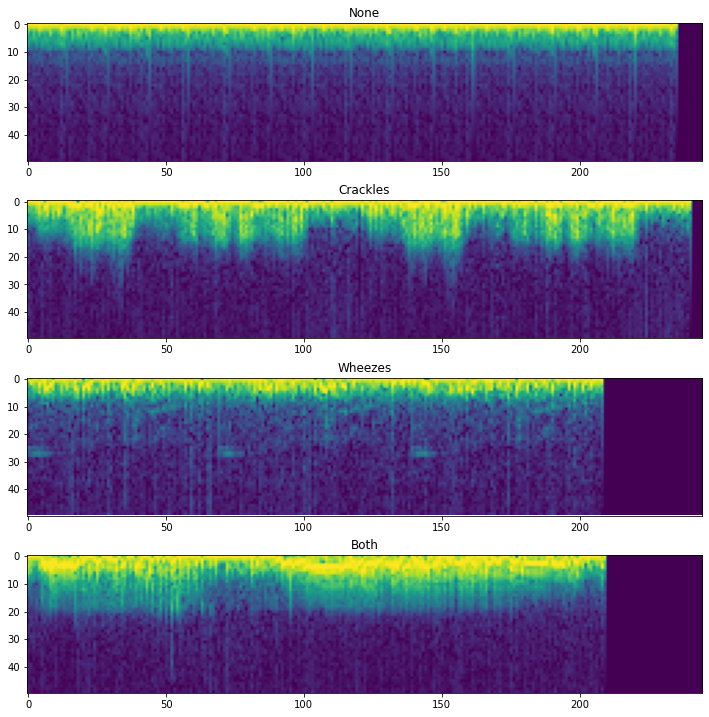

In [53]:
sample_height = train_dict['none'][0][0].shape[0]
sample_width = train_dict['none'][0][0].shape[1]
ind = 1
plt.figure(figsize = (10,10))
plt.subplot(4,1,1)
plt.imshow(train_dict['none'][ind][0].reshape(sample_height, sample_width))
plt.title('None')
plt.subplot(4,1,2)
plt.imshow(train_dict['crackles'][ind][0].reshape(sample_height, sample_width))
plt.title('Crackles')
plt.subplot(4,1,3)
plt.imshow(train_dict['wheezes'][ind][0].reshape(sample_height, sample_width))
plt.title('Wheezes')
plt.subplot(4,1,4)
plt.imshow(train_dict['both'][ind][0].reshape(sample_height, sample_width))
plt.title('Both')
plt.tight_layout()

## Data Pipeline

In [54]:
import scipy.signal

"""
Data generator for both traning and validation. Wraps each sound array on its time axis using FFTroll before feeding to the model
Reference: https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
"""
class data_generator():
    def __init__(self, sound_clips, strides):
        self.clips = sound_clips
        self.strides = strides
        self.lengths = [len(arr) for arr in sound_clips]
    
    def n_available_samples(self):
        return int(min(np.divide(self.lengths, self.strides))) * 4
    
    def generate_keras(self, batch_size):
        cursor = [0,0,0,0]
        while True:
            i = 0
            X,y = [],[]
            for c in range(batch_size):
                cat_length = self.lengths[i]
                cat_clips = self.clips[i]
                cat_stride = self.strides[i]
                cat_advance = np.random.randint(low= 1,high = cat_stride + 1)
                clip = cat_clips[(cursor[i] + cat_advance) % cat_length]
                cursor[i] = (cursor[i] + self.strides[i]) % cat_length #advance cursor
                s = (self.rollFFT(clip))
                X.append(s[0])
                y.append(s[1])
                i = (i + 1) % 4 # go to next class
            yield (np.reshape(X, (batch_size, sample_height, sample_width, 1)),
                   np.reshape(y,(batch_size,4)))

    #Transpose and wrap each array along the time axis
    def rollFFT(self, fft_info):
        fft = fft_info[0]
        n_col = fft.shape[1]
        pivot = np.random.randint(n_col)
        return ((np.roll(fft, pivot, axis = 1)), fft_info[1])

#Used for validation set
class feed_all():
    #sound_clips = [[none],[crackles],[wheezes],[both]]
    #strides: How far the sampling index for each category is advanced for each step
    def __init__(self, sound_clips, roll = True):
        merged = []
        for arr in sound_clips:
            merged.extend(arr)
        np.random.shuffle(merged)
        self.clips = merged
        self.nclips = len(merged)
        self.roll = roll
    
    def n_available_samples(self):
        return len(self.clips)
    
    def generate_keras(self, batch_size):
        i = 0
        while True:
            X,y = [],[]
            for b in range(batch_size):
                clip = self.clips[i]
                i = (i + 1) % self.nclips
                if(self.roll):
                    s = (self.rollFFT(clip))
                    X.append(s[0])
                    y.append(s[1])
                else:
                    X.append(clip[0])
                    y.append(clip[1])
                    
            yield (np.reshape(X, (batch_size,sample_height, sample_width,1)),
                   np.reshape(y,(batch_size, 4)))

    #Transpose and wrap each array along the time axis
    def rollFFT(self, fft_info):
        fft = fft_info[0]
        n_col = fft.shape[1]
        pivot = np.random.randint(n_col)
        return ((np.roll(fft, pivot, axis = 1)), fft_info[1])

In [55]:
[none_train, c_train, w_train, c_w_train] = [train_dict['none'], train_dict['crackles'], train_dict['wheezes'], train_dict['both']]
[none_test, c_test, w_test,c_w_test] =  [test_dict['none'], test_dict['crackles'], test_dict['wheezes'], test_dict['both']]

np.random.shuffle(none_train)
np.random.shuffle(c_train)
np.random.shuffle(w_train)
np.random.shuffle(c_w_train)

#Data pipeline objects
train_gen = data_generator([none_train, c_train, w_train, c_w_train], [1,1,1,1])
test_gen = feed_all([none_test, c_test, w_test,c_w_test])

In [64]:
batch_size = 128
epochs = 16

In [66]:
#Keras implementation
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU
import tensorflow as tf
K.clear_session()

model = Sequential()
model.add(Conv2D(128, [7,11], strides = [2,2], padding = 'SAME', input_shape = (sample_height, sample_width, 1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [5,5], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(256, [1,1], padding = 'SAME'))
model.add(Conv2D(256, [3,3], padding = 'SAME'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'SAME'))

model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'SAME'))
model.add(Conv2D(512, [3,3], padding = 'SAME', activation = 'relu'))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

initial_learning_rate = 0.0001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)

opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.00, amsgrad=False)

#opt = optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

In [67]:
stats = model.fit_generator(generator = train_gen.generate_keras(batch_size), 
                            steps_per_epoch = train_gen.n_available_samples() // batch_size,
                            validation_data = test_gen.generate_keras(batch_size),
                            validation_steps = test_gen.n_available_samples() // batch_size, 
                            epochs = epochs)

Epoch 1/16
75/75 [==============================] - 1154s 15s/step - loss: 1.3657 - acc: 0.3024 - val_loss: 1.3383 - val_acc: 0.3594
Epoch 2/16
75/75 [==============================] - 1261s 17s/step - loss: 1.3138 - acc: 0.3709 - val_loss: 1.2826 - val_acc: 0.3952
Epoch 3/16
75/75 [==============================] - 1257s 17s/step - loss: 1.2606 - acc: 0.4303 - val_loss: 1.2101 - val_acc: 0.4712
Epoch 4/16
75/75 [==============================] - 1179s 16s/step - loss: 1.1648 - acc: 0.4904 - val_loss: 1.1361 - val_acc: 0.5128
Epoch 5/16
75/75 [==============================] - 1079s 14s/step - loss: 1.0821 - acc: 0.5401 - val_loss: 1.0780 - val_acc: 0.5291
Epoch 6/16
75/75 [==============================] - 1018s 14s/step - loss: 0.9803 - acc: 0.5907 - val_loss: 1.0955 - val_acc: 0.5330
Epoch 7/16
75/75 [==============================] - 1159s 15s/step - loss: 0.9120 - acc: 0.6239 - val_loss: 0.9995 - val_acc: 0.5856
Epoch 8/16
75/75 [==============================] - 1102s 15s/step - 

Text(0.5, 1.0, 'Loss')

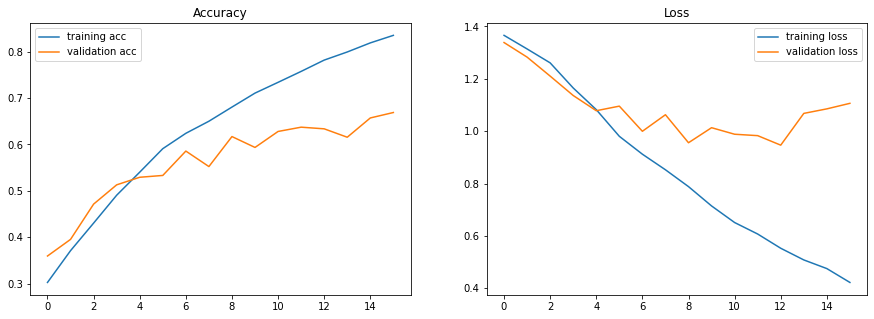

In [68]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(stats.history['acc'], label = 'training acc')
plt.plot(stats.history['val_acc'], label = 'validation acc')
plt.legend()
plt.subplot(1,2,2)
plt.plot(stats.history['loss'], label = 'training loss')
plt.plot(stats.history['val_loss'], label = 'validation loss')
plt.legend()
plt.title('Loss')

In [69]:
test_set = test_gen.generate_keras(test_gen.n_available_samples()).__next__()
predictions = model.predict(test_set[0])
predictions = np.argmax(predictions, axis = 1)
labels = np.argmax(test_set[1], axis = 1)
predictions

array([1, 3, 1, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(labels, predictions, target_names = ['none','crackles','wheezes', 'both']))
cm = confusion_matrix(labels, predictions)
print(cm)

In [73]:
labels = ['none','crackles','wheezes', 'both']
cm_df = pd.DataFrame(cm, columns=labels, index=labels)

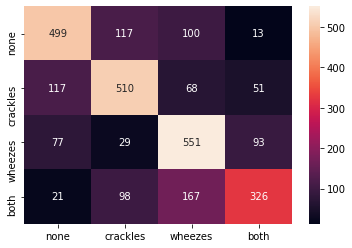

In [74]:
import seaborn as sns
ax = sns.heatmap(cm_df, annot=True, fmt='g')